In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 39.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=35c9c5b4aadd4d4bebc4661f24c68792f51f1286e08f1c320ea57ce185d40e0a
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
import pickle

In [ ]:
import pandas as pd

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# embeddings_balanced_b_path = 'drive/MyDrive/DataBank/wordEmbedding/multiclass/balanced/em_1.csv'
# embeddings_balanced_b_path_im = 'drive/MyDrive/DataBank/wordEmbedding/multiclass/imbalanced/em_1.csv'

embeddings_balanced_b_path = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/multiclass/balanced/em_1.csv'
embeddings_balanced_b_path_im = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/multiclass/imbalanced/em_1.csv'

In [ ]:
plt_data_balanced = []
plt_data_imbalanced = []
plt_ROC_balanced = []
plt_ROC_imbalanced = []

In [ ]:
import sys
import numpy as np

def predictive_entropy(predictions):
    epsilon = sys.float_info.min
    predictive_entropy = -np.sum( np.mean(predictions, axis=0) * np.log(np.mean(predictions, axis=0) + epsilon),
            axis=-1)

    return predictive_entropy

#Balanced Dataset

#UNI - Directional

Adam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.228959321975708. Accuracy: 45.39267% F1-macro: 44.80% F1-weighted: 44.91% cohen_kappa: 0.27%
Iteration: 2000. Loss: 1.4138591289520264. Accuracy: 49.52880% F1-macro: 48.04% F1-weighted: 48.17% cohen_kappa: 0.33%
Iteration: 3000. Loss: 1.0191594362258911. Accuracy: 49.00524% F1-macro: 47.71% F1-weighted: 47.82% cohen_kappa: 0.32%
Iteration: 4000. Loss: 1.2917070388793945. Accuracy: 52.61780% F1-macro: 52.19% F1-weighted: 52.30% cohen_kappa: 0.37%
Iteration: 5000. Loss: 0.9681711196899414. Accuracy: 53.24607% F1-macro: 52.30% F1-weighted: 52.39% cohen_kappa: 0.38%
Iteration: 6000. Loss: 1.2303104400634766. Accuracy: 52.98429% F1-macro: 52.13% F1-weighted: 52.24% cohen_kappa: 0.37%
Iteration: 7000. Loss: 0.9624385833740234. Accuracy: 55.39267% F1-macro: 54.41% F1-weighted: 54.53% cohen_kappa: 0.40%
Iteration: 8000. Loss: 1.083530068397522. Accuracy: 53.97906% F1-macro: 52.35% F1-weighted: 52.46% cohen_kappa: 0.39%
Iteration: 9000. Loss: 1

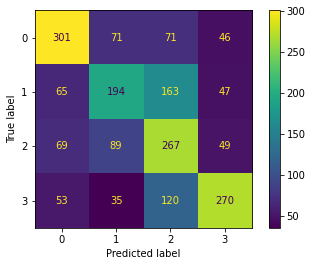

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)
predictions = []

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)

'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            y_pred = []
            y_true = []


            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred) * 100

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-UNI',iter,'Adam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.343576192855835. Accuracy: 43.45550% F1-macro: 41.57% F1-weighted: 41.65% cohen_kappa: 0.25%
Iteration: 2000. Loss: 1.2343543767929077. Accuracy: 48.58639% F1-macro: 48.01% F1-weighted: 48.14% cohen_kappa: 0.31%
Iteration: 3000. Loss: 1.143197774887085. Accuracy: 50.57592% F1-macro: 50.34% F1-weighted: 50.42% cohen_kappa: 0.34%
Iteration: 4000. Loss: 1.033595085144043. Accuracy: 50.83770% F1-macro: 50.30% F1-weighted: 50.36% cohen_kappa: 0.34%
Iteration: 5000. Loss: 1.0204912424087524. Accuracy: 50.94241% F1-macro: 50.88% F1-weighted: 50.97% cohen_kappa: 0.35%
Iteration: 6000. Loss: 1.1389014720916748. Accuracy: 52.04188% F1-macro: 51.39% F1-weighted: 51.48% cohen_kappa: 0.36%
Iteration: 7000. Loss: 1.1057164669036865. Accuracy: 53.61257% F1-macro: 53.39% F1-weighted: 53.46% cohen_kappa: 0.38%
Iteration: 8000. Loss: 1.1971328258514404. Accuracy: 51.25654% F1-macro: 49.13% F1-weighted: 49.27% cohen_kappa: 0.35%
Iteration: 9000. Loss: 0.

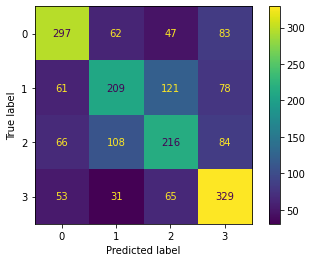

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []

            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-UNI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()


RAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.2600882053375244. Accuracy: 41.09948% F1-macro: 37.53% F1-weighted: 37.70% cohen_kappa: 0.21%
Iteration: 2000. Loss: 1.29365074634552. Accuracy: 49.42408% F1-macro: 48.19% F1-weighted: 48.29% cohen_kappa: 0.33%
Iteration: 3000. Loss: 1.2683351039886475. Accuracy: 48.63874% F1-macro: 48.44% F1-weighted: 48.56% cohen_kappa: 0.32%
Iteration: 4000. Loss: 1.1503287553787231. Accuracy: 46.80628% F1-macro: 45.90% F1-weighted: 45.99% cohen_kappa: 0.29%
Iteration: 5000. Loss: 1.3299094438552856. Accuracy: 51.62304% F1-macro: 50.88% F1-weighted: 50.96% cohen_kappa: 0.35%
Iteration: 6000. Loss: 1.0066637992858887. Accuracy: 52.51309% F1-macro: 52.24% F1-weighted: 52.34% cohen_kappa: 0.37%
Iteration: 7000. Loss: 0.9784286618232727. Accuracy: 51.67539% F1-macro: 51.59% F1-weighted: 51.63% cohen_kappa: 0.36%
Iteration: 8000. Loss: 1.089203119277954. Accuracy: 54.45026% F1-macro: 53.44% F1-weighted: 53.55% cohen_kappa: 0.39%
Iteration: 9000. Loss: 1.

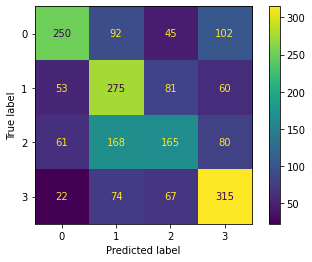

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)


      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []

            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-UNI',iter,'RAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.435361385345459. Accuracy: 46.43979% F1-macro: 45.71% F1-weighted: 45.85% cohen_kappa: 0.29%
Iteration: 2000. Loss: 1.356321930885315. Accuracy: 47.80105% F1-macro: 44.63% F1-weighted: 44.81% cohen_kappa: 0.30%
Iteration: 3000. Loss: 1.2138663530349731. Accuracy: 48.37696% F1-macro: 48.11% F1-weighted: 48.16% cohen_kappa: 0.31%
Iteration: 4000. Loss: 1.0657976865768433. Accuracy: 54.08377% F1-macro: 53.53% F1-weighted: 53.64% cohen_kappa: 0.39%
Iteration: 5000. Loss: 1.3470323085784912. Accuracy: 52.67016% F1-macro: 50.92% F1-weighted: 51.03% cohen_kappa: 0.37%
Iteration: 6000. Loss: 1.098390817642212. Accuracy: 52.82723% F1-macro: 53.26% F1-weighted: 53.34% cohen_kappa: 0.37%
Iteration: 7000. Loss: 1.132394790649414. Accuracy: 53.82199% F1-macro: 53.28% F1-weighted: 53.36% cohen_kappa: 0.38%
Iteration: 8000. Loss: 1.1728873252868652. Accuracy: 55.28796% F1-macro: 54.38% F1-weighted: 54.49% cohen_kappa: 0.40%
Iteration: 9000. Loss: 1.4

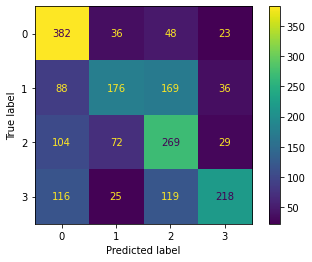

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-BI',iter,'Adam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.2753870487213135. Accuracy: 44.34555% F1-macro: 39.69% F1-weighted: 39.80% cohen_kappa: 0.26%
Iteration: 2000. Loss: 1.250349998474121. Accuracy: 47.64398% F1-macro: 47.08% F1-weighted: 47.21% cohen_kappa: 0.30%
Iteration: 3000. Loss: 1.0738921165466309. Accuracy: 51.09948% F1-macro: 50.79% F1-weighted: 50.89% cohen_kappa: 0.35%
Iteration: 4000. Loss: 1.1955486536026. Accuracy: 53.87435% F1-macro: 52.80% F1-weighted: 52.93% cohen_kappa: 0.38%
Iteration: 5000. Loss: 1.2490360736846924. Accuracy: 51.46597% F1-macro: 50.03% F1-weighted: 50.14% cohen_kappa: 0.35%
Iteration: 6000. Loss: 1.2184520959854126. Accuracy: 54.76440% F1-macro: 53.90% F1-weighted: 53.97% cohen_kappa: 0.40%
Iteration: 7000. Loss: 1.0348528623580933. Accuracy: 53.14136% F1-macro: 52.38% F1-weighted: 52.45% cohen_kappa: 0.38%
Iteration: 8000. Loss: 1.0348632335662842. Accuracy: 55.34031% F1-macro: 55.06% F1-weighted: 55.13% cohen_kappa: 0.40%
Iteration: 9000. Loss: 1.1

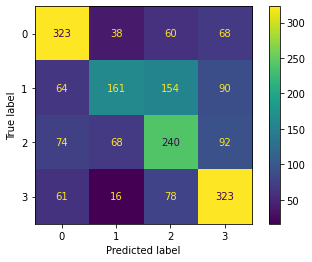

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-BI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.4249857664108276. Accuracy: 44.92147% F1-macro: 41.74% F1-weighted: 41.92% cohen_kappa: 0.26%
Iteration: 2000. Loss: 1.2000763416290283. Accuracy: 46.02094% F1-macro: 42.42% F1-weighted: 42.59% cohen_kappa: 0.28%
Iteration: 3000. Loss: 1.1416844129562378. Accuracy: 50.36649% F1-macro: 49.69% F1-weighted: 49.82% cohen_kappa: 0.34%
Iteration: 4000. Loss: 1.2991880178451538. Accuracy: 52.51309% F1-macro: 51.92% F1-weighted: 52.02% cohen_kappa: 0.37%
Iteration: 5000. Loss: 1.014994502067566. Accuracy: 53.40314% F1-macro: 51.95% F1-weighted: 52.05% cohen_kappa: 0.38%
Iteration: 6000. Loss: 1.0515495538711548. Accuracy: 52.82723% F1-macro: 52.75% F1-weighted: 52.83% cohen_kappa: 0.37%
Iteration: 7000. Loss: 1.4054996967315674. Accuracy: 51.04712% F1-macro: 51.36% F1-weighted: 51.43% cohen_kappa: 0.35%
Iteration: 8000. Loss: 1.2964606285095215. Accuracy: 50.41885% F1-macro: 48.62% F1-weighted: 48.73% cohen_kappa: 0.34%
Iteration: 9000. Loss: 

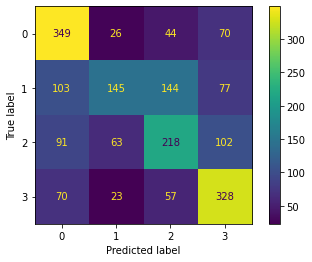

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-BI',iter,'RAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#Imbalanced Dataset

#UNI - Directional

Adam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.243691325187683. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 2000. Loss: 1.2433116436004639. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 3000. Loss: 1.0436688661575317. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 4000. Loss: 1.3436661958694458. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 5000. Loss: 1.1436717510223389. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 6000. Loss: 1.1436684131622314. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 7000. Loss: 1.2436684370040894. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 8000. Loss: 1.3436684608459473. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Uncertainity: 6.046545

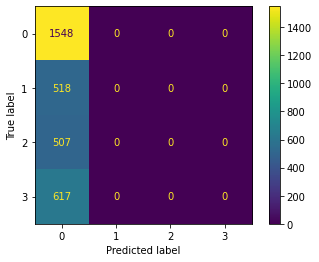

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []

            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-UNI',iter,'Adam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.2342514991760254. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 2000. Loss: 1.0064572095870972. Accuracy: 56.39498% F1-macro: 35.67% F1-weighted: 48.49% cohen_kappa: 0.29%
Iteration: 3000. Loss: 1.2680890560150146. Accuracy: 58.65204% F1-macro: 40.81% F1-weighted: 52.27% cohen_kappa: 0.33%
Iteration: 4000. Loss: 1.0934187173843384. Accuracy: 58.21317% F1-macro: 43.90% F1-weighted: 54.67% cohen_kappa: 0.34%
Iteration: 5000. Loss: 1.0963202714920044. Accuracy: 57.61755% F1-macro: 37.67% F1-weighted: 49.29% cohen_kappa: 0.27%
Iteration: 6000. Loss: 0.9117914438247681. Accuracy: 59.56113% F1-macro: 46.38% F1-weighted: 56.61% cohen_kappa: 0.38%
Iteration: 7000. Loss: 1.2091268301010132. Accuracy: 60.34483% F1-macro: 45.52% F1-weighted: 56.00% cohen_kappa: 0.38%
Iteration: 8000. Loss: 1.0324633121490479. Accuracy: 61.78683% F1-macro: 45.76% F1-weighted: 56.45% cohen_kappa: 0.39%
Uncertainity: 1.01672

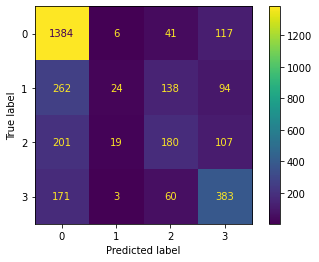

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []

            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-UNI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.4468172788619995. Accuracy: 48.71473% F1-macro: 16.85% F1-weighted: 32.14% cohen_kappa: 0.01%
Iteration: 2000. Loss: 1.3478400707244873. Accuracy: 55.83072% F1-macro: 30.79% F1-weighted: 44.75% cohen_kappa: 0.23%
Iteration: 3000. Loss: 1.1713100671768188. Accuracy: 58.24451% F1-macro: 42.83% F1-weighted: 53.61% cohen_kappa: 0.35%
Iteration: 4000. Loss: 1.2142857313156128. Accuracy: 58.62069% F1-macro: 40.99% F1-weighted: 52.76% cohen_kappa: 0.35%
Iteration: 5000. Loss: 1.194223165512085. Accuracy: 59.02821% F1-macro: 39.79% F1-weighted: 51.61% cohen_kappa: 0.34%
Iteration: 6000. Loss: 1.2540854215621948. Accuracy: 58.55799% F1-macro: 41.31% F1-weighted: 52.27% cohen_kappa: 0.31%
Iteration: 7000. Loss: 1.107088327407837. Accuracy: 61.34796% F1-macro: 46.83% F1-weighted: 56.99% cohen_kappa: 0.38%
Iteration: 8000. Loss: 1.114414930343628. Accuracy: 59.52978% F1-macro: 44.24% F1-weighted: 54.60% cohen_kappa: 0.36%
Uncertainity: 1.057333


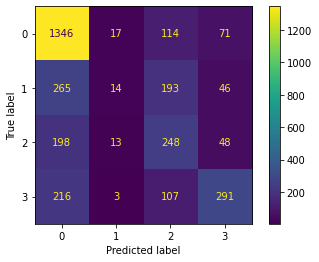

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []

            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-UNI',iter,'RAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.2420557737350464. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 2000. Loss: 1.064367413520813. Accuracy: 56.55172% F1-macro: 35.10% F1-weighted: 47.34% cohen_kappa: 0.25%
Iteration: 3000. Loss: 0.9841645359992981. Accuracy: 57.68025% F1-macro: 40.34% F1-weighted: 51.43% cohen_kappa: 0.30%
Iteration: 4000. Loss: 1.1226823329925537. Accuracy: 60.37618% F1-macro: 43.76% F1-weighted: 54.41% cohen_kappa: 0.35%
Iteration: 5000. Loss: 1.1395431756973267. Accuracy: 58.52665% F1-macro: 39.86% F1-weighted: 51.15% cohen_kappa: 0.29%
Iteration: 6000. Loss: 1.2375085353851318. Accuracy: 59.65517% F1-macro: 47.42% F1-weighted: 56.99% cohen_kappa: 0.39%
Iteration: 7000. Loss: 1.084957480430603. Accuracy: 60.18809% F1-macro: 45.04% F1-weighted: 55.64% cohen_kappa: 0.37%
Iteration: 8000. Loss: 1.0250276327133179. Accuracy: 60.21944% F1-macro: 47.96% F1-weighted: 57.61% cohen_kappa: 0.41%
Uncertainity: 1.2075253

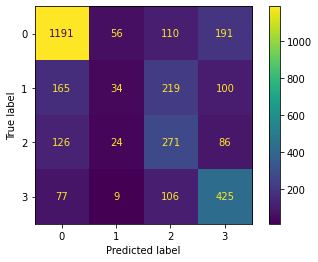

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-BI',iter,'Adam',loss.item()))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.1103037595748901. Accuracy: 54.95298% F1-macro: 30.96% F1-weighted: 44.69% cohen_kappa: 0.26%
Iteration: 2000. Loss: 1.3758933544158936. Accuracy: 56.92790% F1-macro: 36.77% F1-weighted: 48.43% cohen_kappa: 0.26%
Iteration: 3000. Loss: 0.9407612681388855. Accuracy: 58.58934% F1-macro: 41.65% F1-weighted: 52.60% cohen_kappa: 0.31%
Iteration: 4000. Loss: 0.9538509249687195. Accuracy: 59.15361% F1-macro: 45.12% F1-weighted: 55.34% cohen_kappa: 0.34%
Iteration: 5000. Loss: 0.994665801525116. Accuracy: 61.37931% F1-macro: 46.92% F1-weighted: 57.00% cohen_kappa: 0.39%
Iteration: 6000. Loss: 1.1426292657852173. Accuracy: 58.58934% F1-macro: 36.24% F1-weighted: 49.27% cohen_kappa: 0.30%
Iteration: 7000. Loss: 1.148560643196106. Accuracy: 61.72414% F1-macro: 49.54% F1-weighted: 58.87% cohen_kappa: 0.39%
Iteration: 8000. Loss: 1.4199252128601074. Accuracy: 60.06270% F1-macro: 43.88% F1-weighted: 54.37% cohen_kappa: 0.33%
Uncertainity: 0.8700744

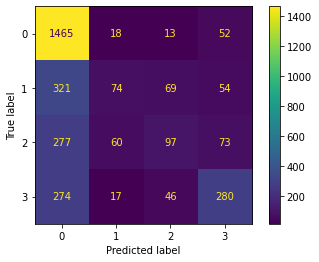

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)

'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []

            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-BI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.3977015018463135. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 2000. Loss: 1.1894950866699219. Accuracy: 55.70533% F1-macro: 37.63% F1-weighted: 49.50% cohen_kappa: 0.28%
Iteration: 3000. Loss: 1.1864291429519653. Accuracy: 57.55486% F1-macro: 39.33% F1-weighted: 51.30% cohen_kappa: 0.32%
Iteration: 4000. Loss: 1.0513211488723755. Accuracy: 57.86834% F1-macro: 38.95% F1-weighted: 50.61% cohen_kappa: 0.29%
Iteration: 5000. Loss: 1.2230910062789917. Accuracy: 59.87461% F1-macro: 42.07% F1-weighted: 53.17% cohen_kappa: 0.34%
Iteration: 6000. Loss: 0.9679500460624695. Accuracy: 60.25078% F1-macro: 45.94% F1-weighted: 56.02% cohen_kappa: 0.36%
Iteration: 7000. Loss: 0.9995356798171997. Accuracy: 60.15674% F1-macro: 46.34% F1-weighted: 56.43% cohen_kappa: 0.36%
Iteration: 8000. Loss: 0.834276556968689. Accuracy: 59.78056% F1-macro: 42.78% F1-weighted: 54.47% cohen_kappa: 0.38%
Uncertainity: 1.049304

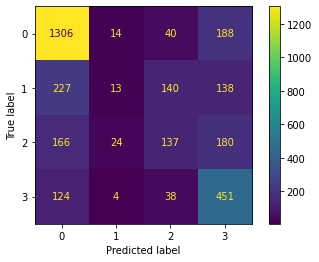

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-BI',iter,'RAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

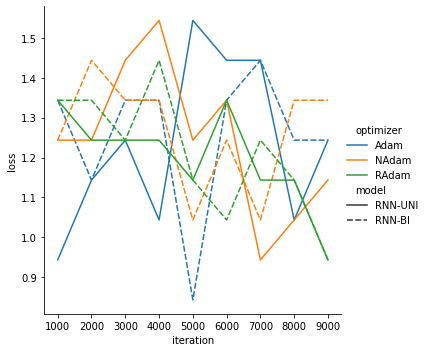

In [ ]:
# loss function plot for balanced dataset

plt_df = pd.DataFrame.from_records(
    plt_data_balanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

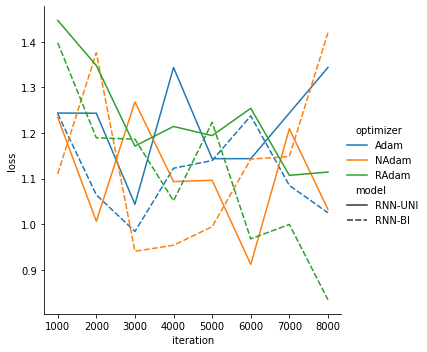

In [ ]:
# loss function plot for imbalanced dataset

plt_df = pd.DataFrame.from_records(
    plt_data_imbalanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

In [ ]:
# # plot ROC for blanaced dataset
# plt.figure()
# lw = 2

# colors = ['red','green','blue']

# for i in range(3):
#   plt.plot(
#       plt_ROC_balanced[i][0],
#       plt_ROC_balanced[i][1],
#       color=colors[i],
#       lw=lw,
#       linestyle="dotted",
#       label="ROC for Model - %d (area = %0.2f)" % (i+1,1 - plt_ROC_balanced[i][2]))

# for i in range(3,6):
#   plt.plot(
#       plt_ROC_balanced[i][0],
#       plt_ROC_balanced[i][1],
#       color=colors[i-3],
#       lw=lw,
#       linestyle="dashdot",
#       label="ROC for Model - %d (area = %0.2f)" % (i+1,1 - plt_ROC_balanced[i][2]))

# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Receiver operating characteristic")
# plt.legend(loc="best")
# plt.show()

In [ ]:
# # plot ROC for imblanaced dataset

# plt.figure()
# lw = 2
# colors = ['red','green','blue']

# for i in range(3):
#   plt.plot(
#       plt_ROC_imbalanced[i][0],
#       plt_ROC_imbalanced[i][1],
#       color=colors[i],
#       lw=lw,
#       linestyle="dotted",
#       label="ROC for Model - %d (area = %0.2f)" % (i+1,1 - plt_ROC_imbalanced[i][2]))

# for i in range(3,6):
#   plt.plot(
#       plt_ROC_imbalanced[i][0],
#       plt_ROC_imbalanced[i][1],
#       color=colors[i-3],
#       lw=lw,
#       linestyle="dashdot",
#       label="ROC for Model - %d (area = %0.2f)" % (i+1,1 - plt_ROC_imbalanced[i][2]))

# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Receiver operating characteristic")
# plt.legend(loc="best")
# plt.show()

In [ ]:
import datetime
ct = datetime.datetime.now()
print("current time:-", ct)

current time:- 2023-03-06 07:54:46.842961
